# PREDICTING A PULSAR STAR

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey . 

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter . 

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars 
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes. 

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. 

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, 
which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators. 

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive). 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image

# img = np.array(Image.open("../input/picture/thumb-1920-510805.jpg"))
# plt.figure(figsize=(15,12))
# plt.imshow(img)
# plt.axis("off")
# plt.show()

# Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below: 

1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 
9. Class 

HTRU 2 Summary 
17,898 total examples. 
1,639 positive examples. 
16,259 negative examples.



# Data

In [3]:
data = pd.read_csv("pulsar_stars.csv")
data.head()

Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                            -0.515088                   1.677258   
2                             1.051164                   3.121237   
3                            -0.636238                   3.642977   
4                             1.123492                   1.178930   

    Standard deviation of the DM-SNR curve  \
0                                19.110426   
1                                14.860146   
2                                21.744669   
3                                20.959280   
4                                11.468720   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   
3                              6.896499                      53.593661   
4                             14.269573                     252.567306   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0

# Data dimensions

In [4]:
print ("Number of rows    :",data.shape[0])
print ("Number of columns :",data.shape[1])

Number of rows    : 17898
Number of columns : 9


# Data Information

In [5]:
print ("data info  :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
data info  : None


# Missing values

In [6]:
print (data.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [7]:
#Renaming columns
data = data.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })


# Data summary

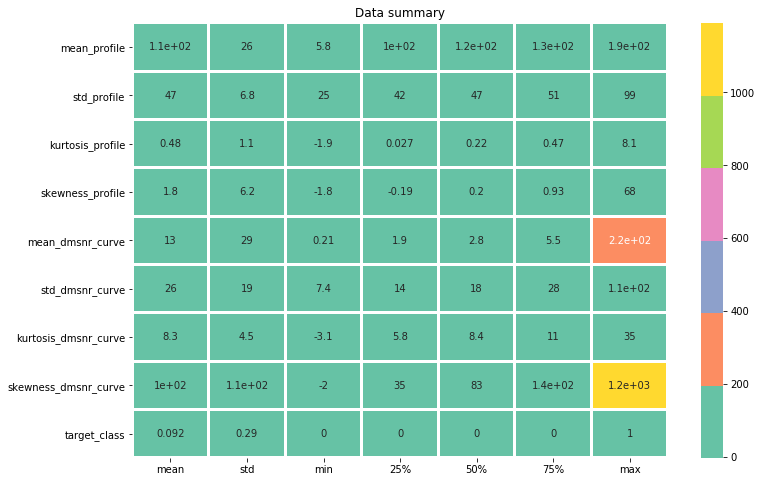

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

# CORRELATION BETWEEN VARIABLES

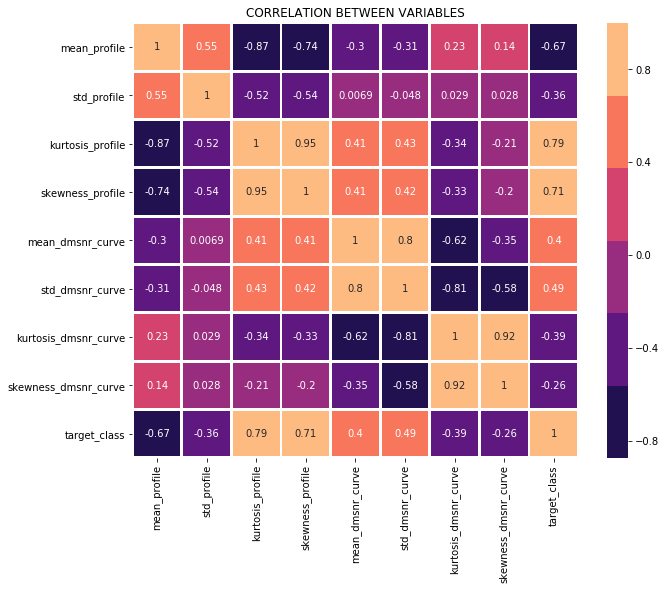

In [9]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

# Proportion of target variable in dataset

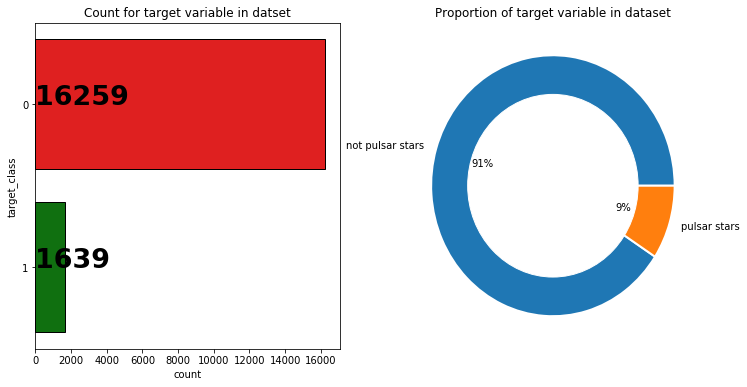

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = data["target_class"],
                   palette=["r","g"],
                   linewidth=1,
                   edgecolor="k"*2)
for i,j in enumerate(data["target_class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data["target_class"].value_counts().values,
        labels=["not pulsar stars","pulsar stars"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

### COMPARING MEAN & STANDARD DEVIATION BETWEEN ATTRIBUTES FOR TARGET CLASSES

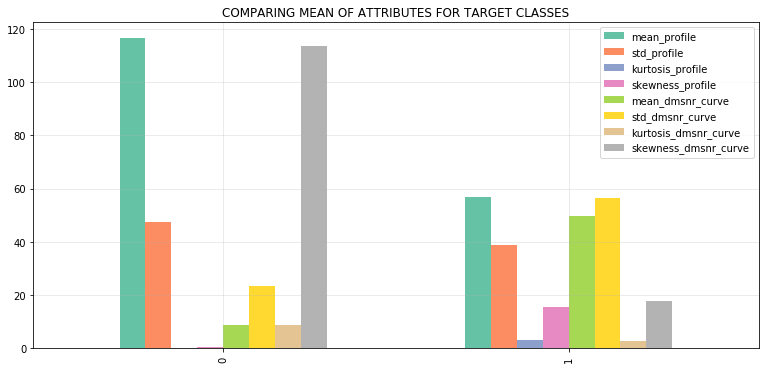

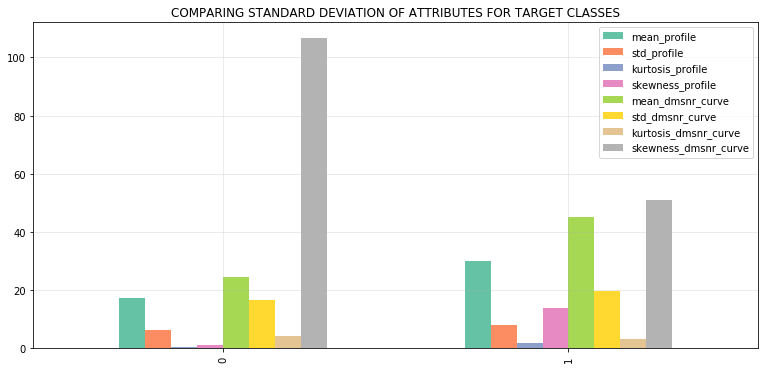

In [11]:
compare = data.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                                        'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
                                        'skewness_dmsnr_curve']].mean().reset_index()


compare = compare.drop("target_class",axis =1)

compare.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare1 = data.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
                                        'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
                                        'skewness_dmsnr_curve']].std().reset_index()
compare1 = compare1.drop("target_class",axis=1)
compare1.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.show()

### COMPARING MEAN & STANDARD DEVIATION BETWEEN ATTRIBUTES FOR TARGET CLASSES

[GREEN == STAR , RED == NOTSTAR]


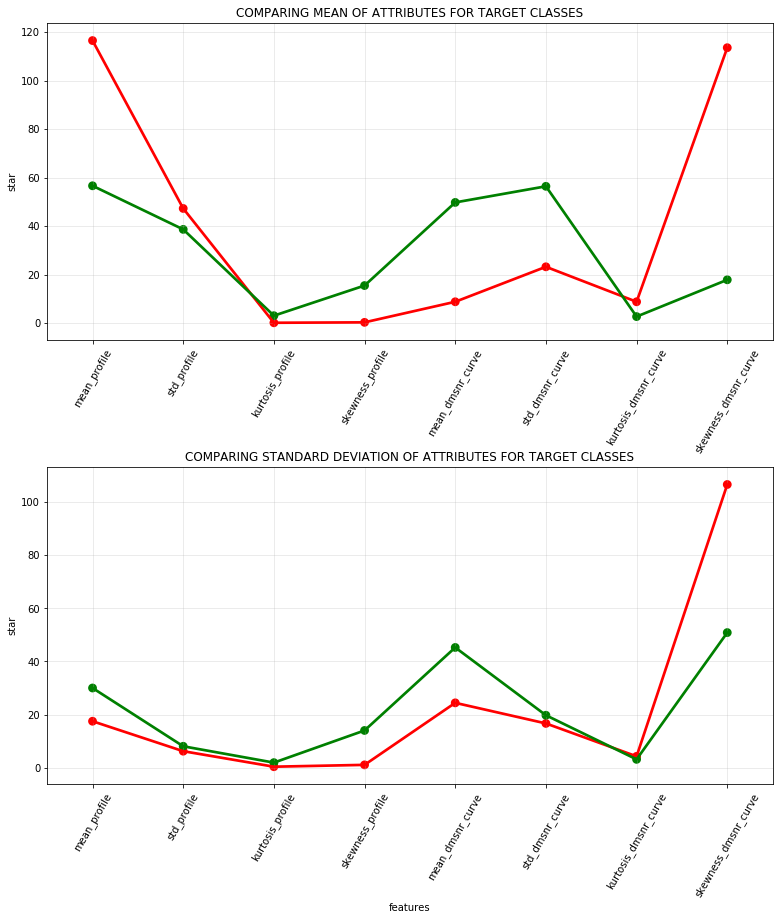

In [12]:
compare_mean = compare.transpose().reset_index()
compare_mean = compare_mean.rename(columns={'index':"features", 0:"not_star", 1:"star"})
plt.figure(figsize=(13,14))
plt.subplot(211)
sns.pointplot(x= "features",y="not_star",data=compare_mean,color="r")
sns.pointplot(x= "features",y="star",data=compare_mean,color="g")
plt.xticks(rotation =60)
plt.xlabel("")
plt.grid(True,alpha=.3)
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

compare_std = compare1.transpose().reset_index()
compare_std = compare_std.rename(columns={'index':"features", 0:"not_star", 1:"star"})
plt.subplot(212)
sns.pointplot(x= "features",y="not_star",data=compare_std,color="r")
sns.pointplot(x= "features",y="star",data=compare_std,color="g")
plt.xticks(rotation =60)
plt.grid(True,alpha=.3)
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(hspace =.4)
print ("[GREEN == STAR , RED == NOTSTAR]")
plt.show()


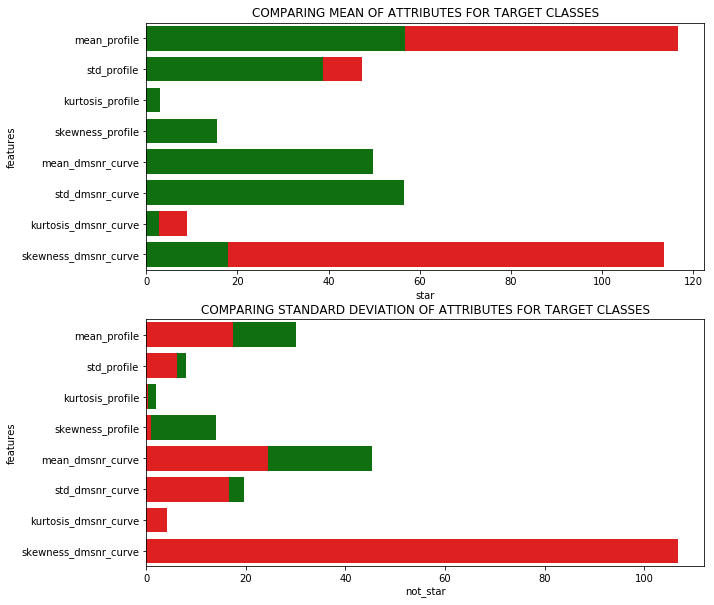

In [13]:
compare_mean
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.barplot(y="features",x="not_star",
            data=compare_mean,color="r")
sns.barplot(y="features",x="star",
            data=compare_mean,color="g")
plt.title("COMPARING MEAN OF ATTRIBUTES FOR TARGET CLASSES")

plt.subplot(212)
sns.barplot(y="features",x="star",
            data=compare_std,color="g")
sns.barplot(y="features",x="not_star",
            data=compare_std,color="r")
plt.title("COMPARING STANDARD DEVIATION OF ATTRIBUTES FOR TARGET CLASSES")
plt.subplots_adjust(wspace =.5)


# DISTIBUTION OF VARIABLES IN DATA SET

***************************************
DISTIBUTION OF VARIABLES IN DATA SET
***************************************


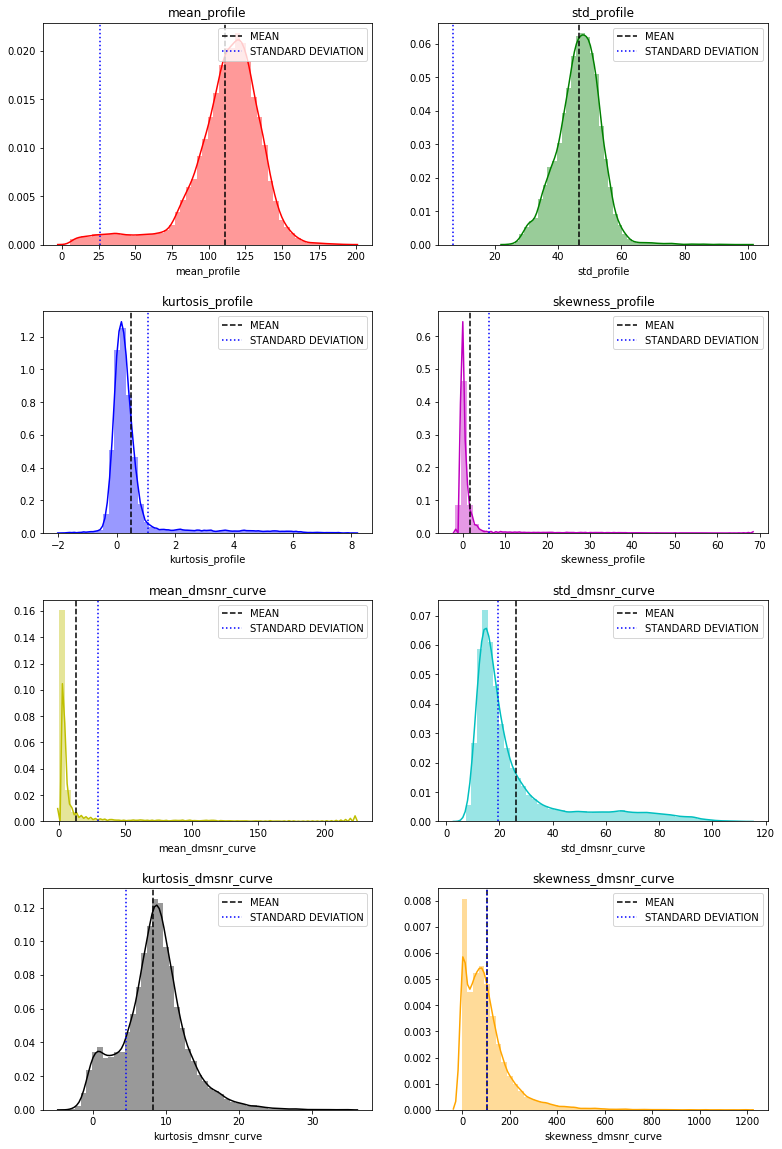

In [14]:
columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr_curve', 'std_dmsnr_curve', 'kurtosis_dmsnr_curve',
           'skewness_dmsnr_curve']
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(data[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    
print ("***************************************")
print ("DISTIBUTION OF VARIABLES IN DATA SET")
print ("***************************************")

# PAIR PLOT BETWEEN ALL VARIABLES

In [29]:
np.shape(data)
type(data)

pandas.core.frame.DataFrame

In [35]:
data.head()

mean_profile  std_profile  kurtosis_profile  skewness_profile  \
0    140.562500    55.683782         -0.234571         -0.699648   
1    102.507812    58.882430          0.465318         -0.515088   
2    103.015625    39.341649          0.323328          1.051164   
3    136.750000    57.178449         -0.068415         -0.636238   
4     88.726562    40.672225          0.600866          1.123492   

   mean_dmsnr_curve  std_dmsnr_curve  kurtosis_dmsnr_curve  \
0          3.199833        19.110426              7.975532   
1          1.677258        14.860146             10.576487   
2          3.121237        21.744669              7.735822   
3          3.642977        20.959280              6.896499   
4          1.178930        11.468720             14.269573   

   skewness_dmsnr_curve  target_class  
0             74.242225             0  
1            127.393580             0  
2             63.171909             0  
3             53.593661             0  
4            252.567306             0

In [108]:
data2 = data.drop(['target_class'], axis=1)

In [109]:
data2

mean_profile  std_profile  kurtosis_profile  skewness_profile  \
0        140.562500    55.683782         -0.234571         -0.699648   
1        102.507812    58.882430          0.465318         -0.515088   
2        103.015625    39.341649          0.323328          1.051164   
3        136.750000    57.178449         -0.068415         -0.636238   
4         88.726562    40.672225          0.600866          1.123492   
5         93.570312    46.698114          0.531905          0.416721   
6        119.484375    48.765059          0.031460         -0.112168   
7        130.382812    39.844056         -0.158323          0.389540   
8        107.250000    52.627078          0.452688          0.170347   
9        107.257812    39.496488          0.465882          1.162877   
10       142.078125    45.288073         -0.320328          0.283953   
11       133.257812    44.058244         -0.081060          0.115362   
12       134.960938    49.554327         -0.135304         -0.080470   
13       117.945312    45.506577          0.325438          0.661459   
14       138.179688    51.524484         -0.031852          0.046797   
15       114.367188    51.945716         -0.094499         -0.287984   
16       109.640625    49.017652          0.137636         -0.256700   
17       100.851562    51.743522          0.393837         -0.011241   
18       136.093750    51.691005         -0.045909         -0.271816   
19        99.367188    41.572202          1.547197          4.154106   
20       100.890625    51.890394          0.627487         -0.026498   
21       105.445312    41.139969          0.142654          0.320420   
22        95.867188    42.059922          0.326387          0.803502   
23       117.367188    53.908614          0.257953         -0.405049   
24       106.648438    56.367182          0.378355         -0.266372   
25       112.718750    50.301270          0.279391         -0.129011   
26       130.851562    52.432857          0.142597          0.018885   
27       119.437500    52.874815         -0.002549         -0.460360   
28       123.210938    51.078012          0.179377         -0.177285   
29       102.617188    49.692354          0.230439          0.193325   
...             ...          ...               ...               ...   
17868     96.859375    49.822769          0.276811         -0.331824   
17869    137.375000    50.762775          0.085075         -0.092679   
17870    110.765625    55.342186          0.066100         -0.500415   
17871    119.007812    52.091041          0.215294         -0.020229   
17872    139.898438    44.281034         -0.044618          0.100841   
17873     89.453125    35.848827          0.731656          3.101474   
17874    126.554688    54.275888          0.207825         -0.191686   
17875    133.140625    43.706181         -0.012686          0.232394   
17876    111.765625    52.943585          0.671724          0.383594   
17877    118.296875    49.932824          0.144401         -0.269273   
17878     90.148438    40.786044          0.457139          0.885516   
17879    107.664062    44.462463          0.296046          0.227765   
17880    105.492188    43.500718          0.154180          0.408117   
17881    130.500000    46.149553          0.084445         -0.107355   
17882    131.000000    55.935789         -0.023598         -0.536651   
17883     84.421875    41.775555          0.757467          1.107075   
17884    106.875000    47.571328          0.199440          0.284964   
17885    133.820312    43.478161          0.136691          0.353121   
17886    127.070312    47.663564          0.006552         -0.123634   
17887    121.375000    53.245158          0.103772         -0.365119   
17888     98.726562    50.407823          0.565124          0.245231   
17889    126.625000    55.721826          0.002946         -0.303218   
17890    143.671875    45.302647         -0.045769          0.353643   
17891    118.484375    50.608483         -0.029

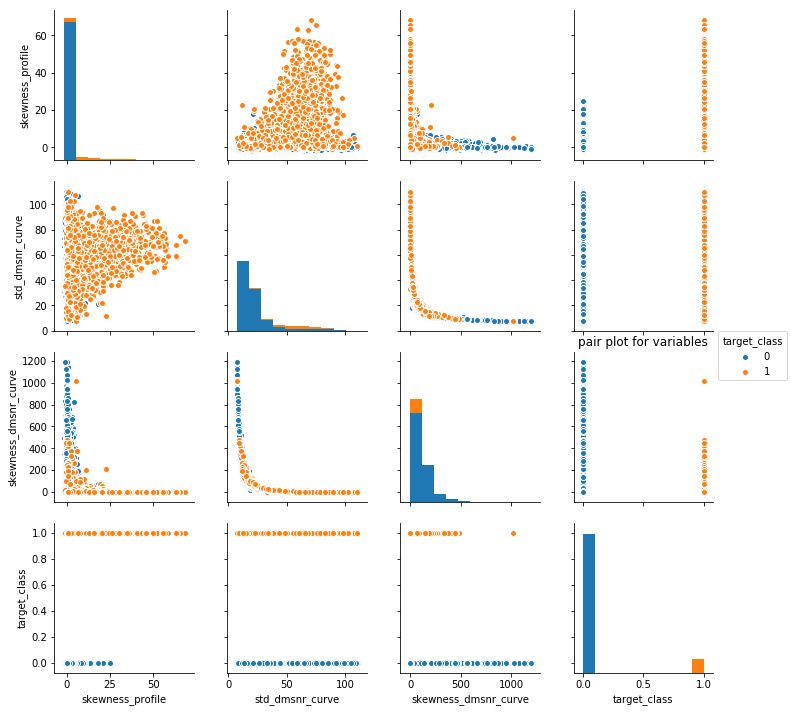

In [44]:
sns.pairplot(data2,hue="target_class")
plt.title("pair plot for variables")
plt.show()

TypeError: scatter() missing 2 required positional arguments: 'xs' and 'ys'

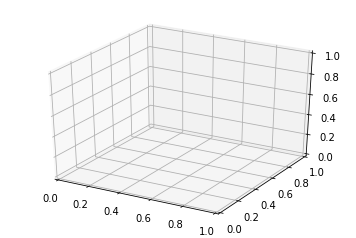

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x = "skewness_profile", y = "std_dmsnr_curve", z = "skewness_dmsnr_curve",
           data=data[data['target_class'] == 1], color='skyblue', alpha=.7, linewidths=.4, s=30)
plt.show()

In [121]:
from sklearn.decomposition import PCA

data2.head()

pca = PCA(n_components=8, svd_solver='full')
r = pca.fit_transform(data2)

In [115]:
data2.head()

mean_profile  std_profile  kurtosis_profile  skewness_profile  \
0    140.562500    55.683782         -0.234571         -0.699648   
1    102.507812    58.882430          0.465318         -0.515088   
2    103.015625    39.341649          0.323328          1.051164   
3    136.750000    57.178449         -0.068415         -0.636238   
4     88.726562    40.672225          0.600866          1.123492   

   mean_dmsnr_curve  std_dmsnr_curve  kurtosis_dmsnr_curve  \
0          3.199833        19.110426              7.975532   
1          1.677258        14.860146             10.576487   
2          3.121237        21.744669              7.735822   
3          3.642977        20.959280              6.896499   
4          1.178930        11.468720             14.269573   

   skewness_dmsnr_curve  
0             74.242225  
1            127.393580  
2             63.171909  
3             53.593661  
4            252.567306

In [123]:
np.shape(r)

(17898, 8)

# Scatter plot between variable for target classes

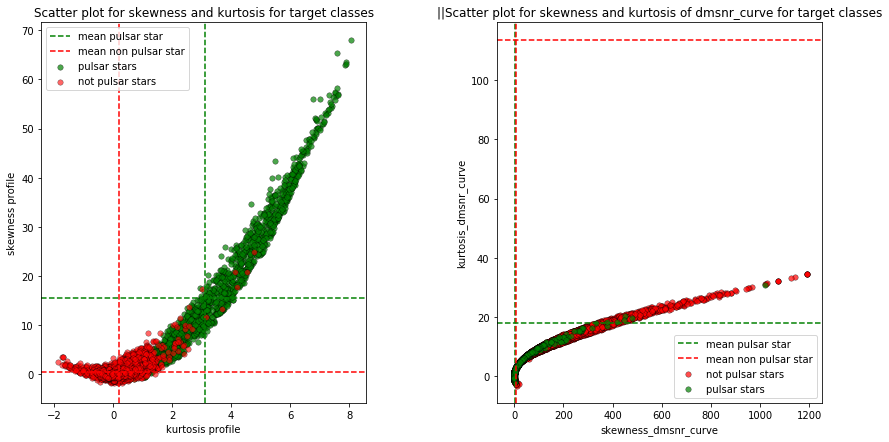

In [16]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=data[data["target_class"] == 1],alpha=.7,
            label="pulsar stars",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=data[data["target_class"] == 0],alpha=.6,
            label="not pulsar stars",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.axvline(data[data["target_class"] == 1]["kurtosis_profile"].mean(),
            color = "g",linestyle="dashed",label="mean pulsar star")
plt.axvline(data[data["target_class"] == 0]["kurtosis_profile"].mean(),
            color = "r",linestyle="dashed",label ="mean non pulsar star")
plt.axhline(data[data["target_class"] == 1]["skewness_profile"].mean(),
            color = "g",linestyle="dashed")
plt.axhline(data[data["target_class"] == 0]["skewness_profile"].mean(),
            color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("kurtosis profile")
plt.ylabel("skewness profile")
plt.title("Scatter plot for skewness and kurtosis for target classes")
plt.subplot(122)
plt.scatter(x = "skewness_dmsnr_curve",y = 'kurtosis_dmsnr_curve',
            data=data[data["target_class"] == 0],alpha=.7,
            label="not pulsar stars",s=30,color ="r",linewidths=.4,edgecolors="black")
plt.scatter(x = "skewness_dmsnr_curve",y = 'kurtosis_dmsnr_curve',
            data=data[data["target_class"] == 1],alpha=.7,
            label="pulsar stars",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.axvline(data[data["target_class"] == 1]["kurtosis_dmsnr_curve"].mean(),
            color = "g",linestyle="dashed",label ="mean pulsar star")
plt.axvline(data[data["target_class"] == 0]["kurtosis_dmsnr_curve"].mean(),
            color = "r",linestyle="dashed",label ="mean non pulsar star")
plt.axhline(data[data["target_class"] == 1]["skewness_dmsnr_curve"].mean(),
            color = "g",linestyle="dashed")
plt.axhline(data[data["target_class"] == 0]["skewness_dmsnr_curve"].mean(),
            color = "r",linestyle="dashed")
plt.legend(loc ="best")
plt.xlabel("skewness_dmsnr_curve")
plt.ylabel('kurtosis_dmsnr_curve')
plt.title("||Scatter plot for skewness and kurtosis of dmsnr_curve for target classes")
plt.subplots_adjust(wspace =.4)

# BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS

****************************************************
BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS
****************************************************


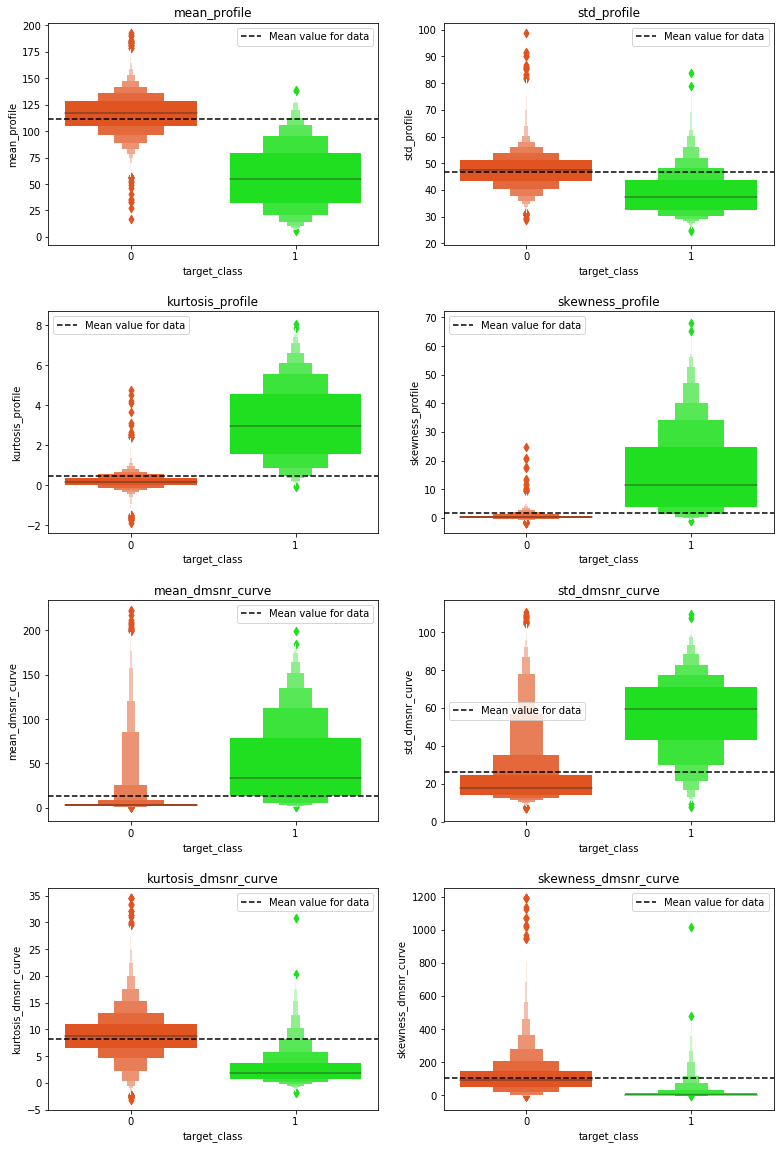

In [54]:
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.lvplot(x=data["target_class"],y=data[i],palette=["orangered","lime"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(data[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")
    
print ("****************************************************")
print ("BOXPLOT FOR VARIABLES IN DATA SET WITH TARGET CLASS")
print ("****************************************************")

# Area plot for attributes of pulsar stars vs non pulsar stars

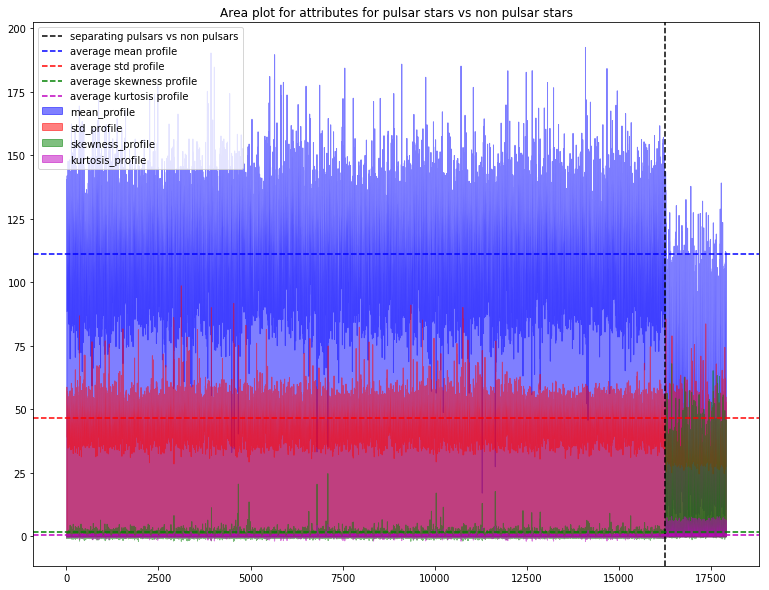

In [55]:
st = data[data["target_class"] == 1].reset_index()
nst= data[data["target_class"] == 0].reset_index()
new = pd.concat([nst,st]).reset_index()

plt.figure(figsize=(13,10))
plt.stackplot(new.index,new["mean_profile"],
              alpha =.5,color="b",labels=["mean_profile"])
plt.stackplot(new.index,new["std_profile"],
              alpha=.5,color="r",labels=["std_profile"])
plt.stackplot(new.index,new["skewness_profile"],
              alpha=.5,color ="g",labels=["skewness_profile"])
plt.stackplot(new.index,new["kurtosis_profile"],
              alpha=.5,color = "m",labels=["kurtosis_profile"])
plt.axvline(x=16259,color = "black",linestyle="dashed",
            label = "separating pulsars vs non pulsars")
plt.axhline(new["mean_profile"].mean(),color = "b",
            linestyle="dashed",label = "average mean profile")
plt.axhline(new["std_profile"].mean(),color = "r",
            linestyle="dashed",label = "average std profile")
plt.axhline(new["skewness_profile"].mean(),color = "g",
            linestyle="dashed",label = "average skewness profile")
plt.axhline(new["kurtosis_profile"].mean(),color = "m",
            linestyle="dashed",label = "average kurtosis profile")
plt.legend(loc="best")
plt.title("Area plot for attributes for pulsar stars vs non pulsar stars")
plt.show()

# Area plot for dmsnr_curve attributes of pulsar stars vs non pulsar star

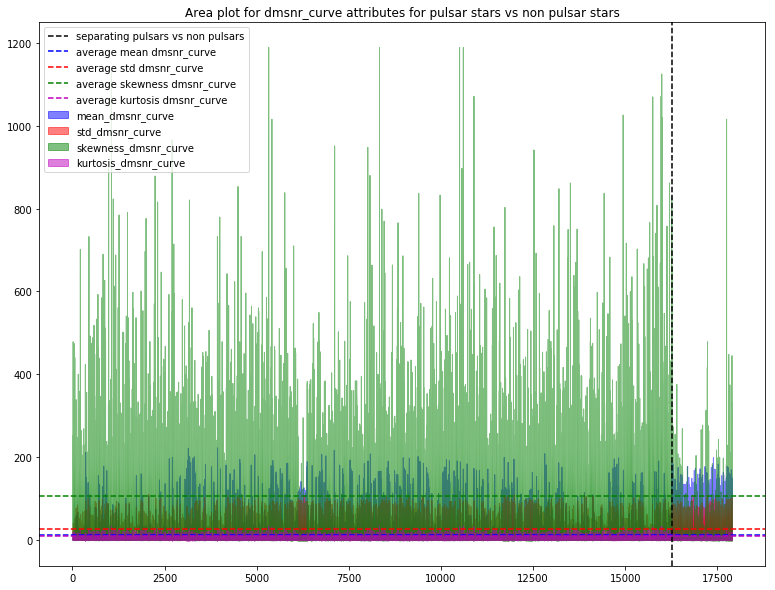

In [56]:
plt.figure(figsize=(13,10))
plt.stackplot(new.index,new["mean_dmsnr_curve"],
              color="b",alpha=.5,labels=["mean_dmsnr_curve"])
plt.stackplot(new.index,new["std_dmsnr_curve"],
              color="r",alpha=.5,labels=["std_dmsnr_curve"])
plt.stackplot(new.index,new["skewness_dmsnr_curve"],color="g",
              alpha=.5,labels=["skewness_dmsnr_curve"])
plt.stackplot(new.index,new["kurtosis_dmsnr_curve"],color="m",
              alpha=.5,labels=["kurtosis_dmsnr_curve"])
plt.axvline(x=16259,color = "black",linestyle="dashed",
            label = "separating pulsars vs non pulsars")
plt.axhline(new["mean_dmsnr_curve"].mean(),color = "b",linestyle="dashed",
            label = "average mean dmsnr_curve")
plt.axhline(new["std_dmsnr_curve"].mean(),color = "r",
            linestyle="dashed",label = "average std dmsnr_curve")
plt.axhline(new["skewness_dmsnr_curve"].mean(),color = "g",
            linestyle="dashed",label = "average skewness dmsnr_curve")
plt.axhline(new["kurtosis_dmsnr_curve"].mean(),color = "m",
            linestyle="dashed",label = "average kurtosis dmsnr_curve")
plt.legend(loc="best")
plt.title("Area plot for dmsnr_curve attributes for pulsar stars vs non pulsar stars")
plt.show()

## 3D PLOT FOR MEAN_PROFILE VS STD_PROFILE VS SKEWNESS_DMSNR_CURVE

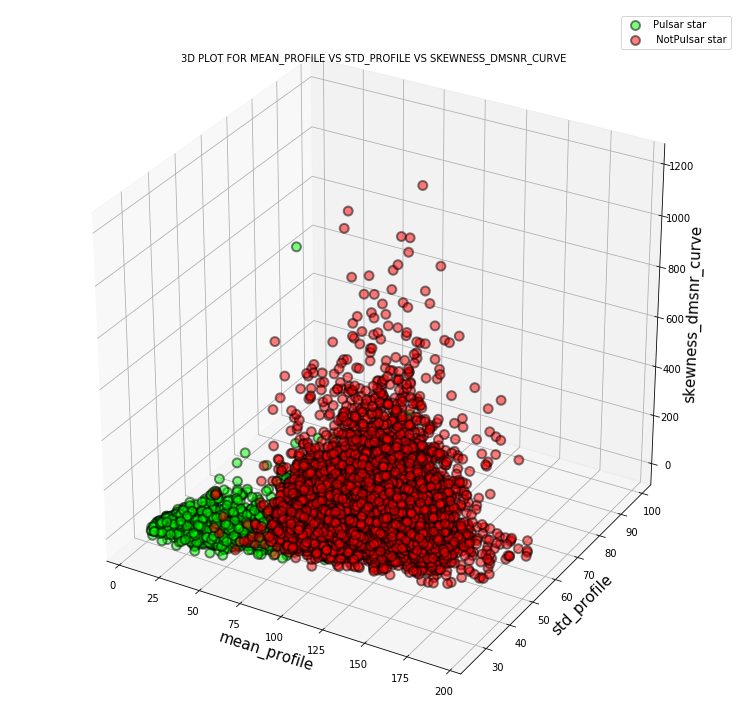

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))
ax  = fig.add_subplot(111,projection = "3d")

ax.scatter(data[data["target_class"] == 1][["mean_profile"]],data[data["target_class"] == 1][["std_profile"]],data[data["target_class"] == 1][["skewness_dmsnr_curve"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="lime",label="Pulsar star")
ax.scatter(data[data["target_class"] == 0][["mean_profile"]],data[data["target_class"] == 0][["std_profile"]],data[data["target_class"] == 0][["skewness_dmsnr_curve"]],
           alpha=.5,s=80,linewidth=2,edgecolor="k",color="r",label=" NotPulsar star")

ax.set_xlabel("mean_profile",fontsize=15)
ax.set_ylabel("std_profile",fontsize=15)
ax.set_zlabel("skewness_dmsnr_curve",fontsize=15)
plt.legend(loc="best")
fig.set_facecolor("w")
plt.title("3D PLOT FOR MEAN_PROFILE VS STD_PROFILE VS SKEWNESS_DMSNR_CURVE",fontsize=10)
plt.show()

# DENSITY PLOT BETWEEN MEAN_PROFILE & STD_PROFILE

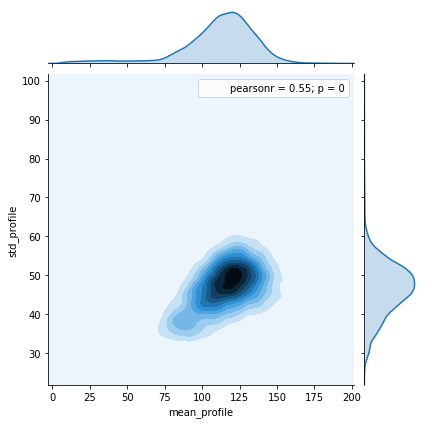

In [58]:
sns.jointplot(data["mean_profile"],data["std_profile"],kind="kde",scale=10)
plt.show()

# Bubble plot between mean,std for skewness and kurtosis

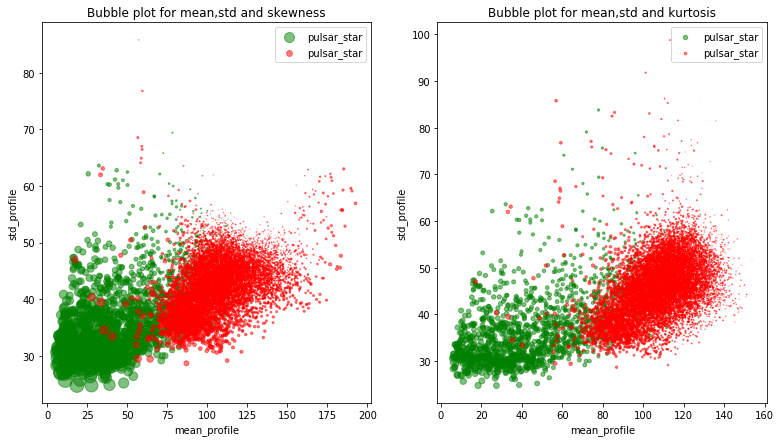

In [59]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.scatter(st["mean_profile"],st["std_profile"],alpha=.5,
            s=st["skewness_profile"]*3,linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_profile"],nst["std_profile"],alpha=.5,
            s=nst["skewness_profile"]*3,linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_profile")
plt.ylabel("std_profile")
plt.title("Bubble plot for mean,std and skewness")


plt.subplot(122)
plt.scatter(st["mean_profile"],st["std_profile"],alpha=.5,
            s=st["kurtosis_profile"]*5,linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_profile"],nst["std_profile"],alpha=.5,
            s=nst["kurtosis_profile"]*5,linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_profile")
plt.ylabel("std_profile")
plt.title("Bubble plot for mean,std and kurtosis")
plt.show()

### Bubble plot between mean_dmsnr_curve,std_dmsnr_curve for skewness_dmsnr_curve and kurtosis_dmsnr_curve

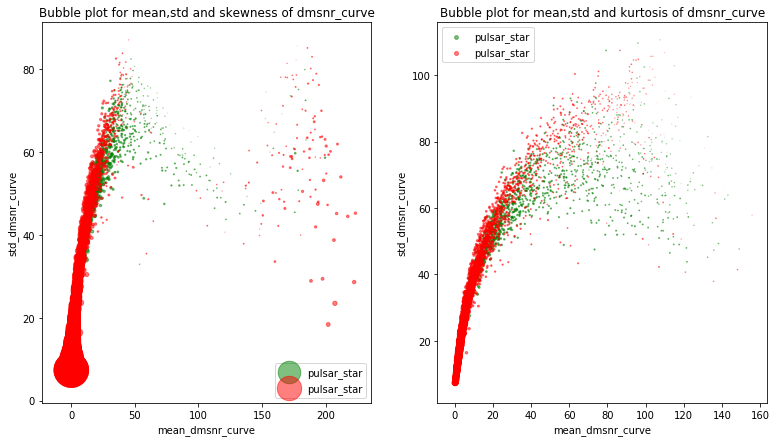

In [60]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.scatter(st["mean_dmsnr_curve"],st["std_dmsnr_curve"],
            alpha=.5,s=st["skewness_dmsnr_curve"],linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_dmsnr_curve"],nst["std_dmsnr_curve"],
            alpha=.5,s=nst["skewness_dmsnr_curve"],linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_dmsnr_curve")
plt.ylabel("std_dmsnr_curve")
plt.title("Bubble plot for mean,std and skewness of dmsnr_curve")


plt.subplot(122)
plt.scatter(st["mean_dmsnr_curve"],st["std_dmsnr_curve"],
            alpha=.5,s=st["kurtosis_dmsnr_curve"],linewidths=1,color="g",label="pulsar_star")
plt.scatter(nst["mean_dmsnr_curve"],nst["std_dmsnr_curve"],
            alpha=.5,s=nst["kurtosis_dmsnr_curve"],linewidths=1,color="r",label="pulsar_star")
plt.legend(loc="best")
plt.xlabel("mean_dmsnr_curve")
plt.ylabel("std_dmsnr_curve")
plt.title("Bubble plot for mean,std and kurtosis of dmsnr_curve")
plt.show()

# visualizing the distribution of a variables for target class

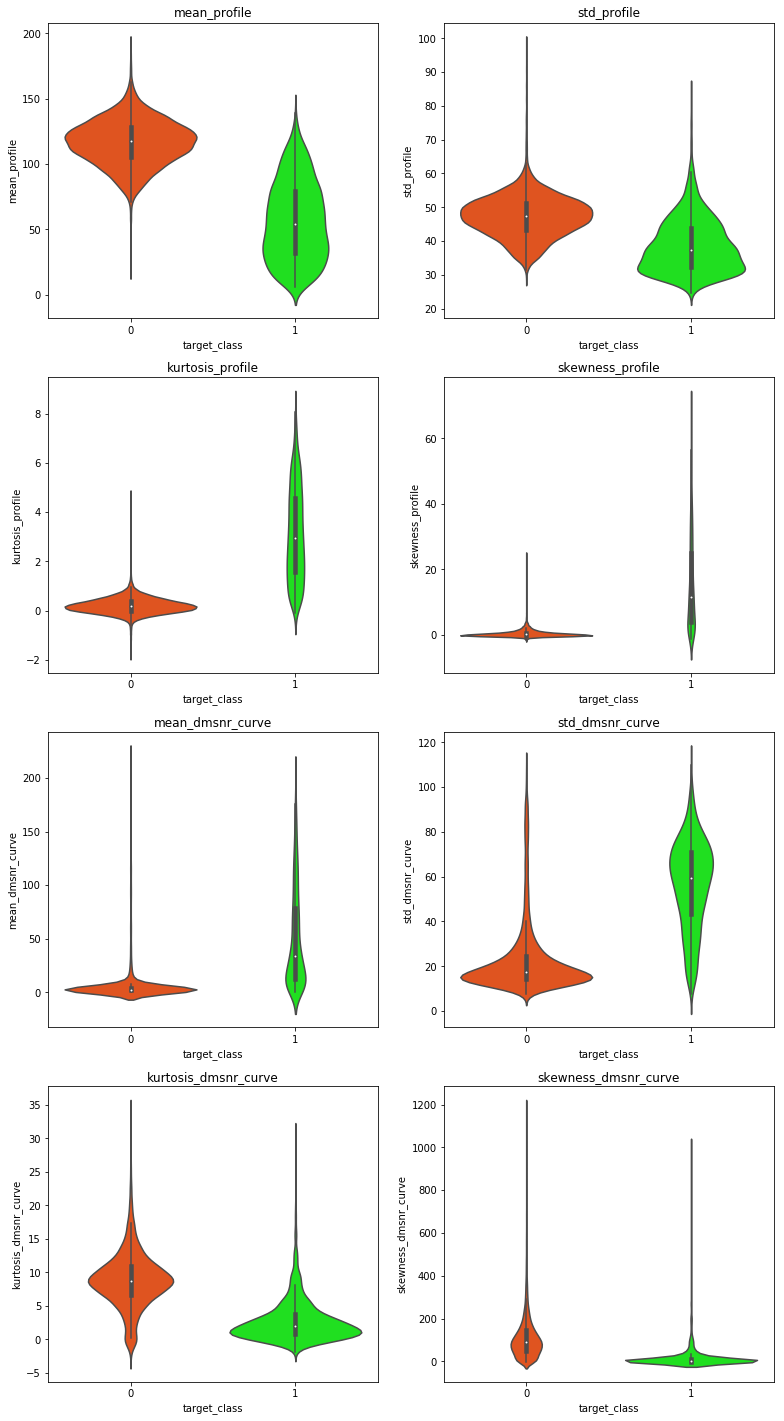

In [61]:
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)

plt.figure(figsize=(13,25))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["target_class"],y=data[i],
                   palette=["Orangered","lime"],alpha=.5)
    plt.title(i)

# Parllel coordinates plot to compare features between variables

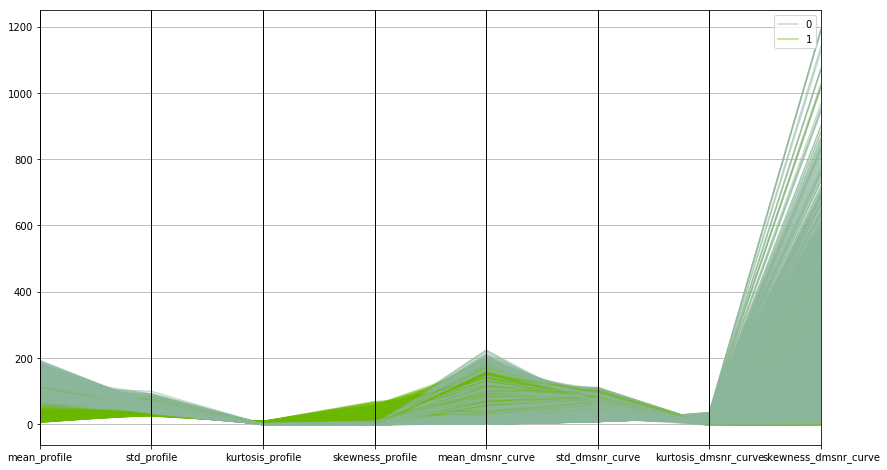

In [62]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(14,8))
parallel_coordinates(data,"target_class",alpha=.5)
plt.show()

# Proportion of target class in train & test data

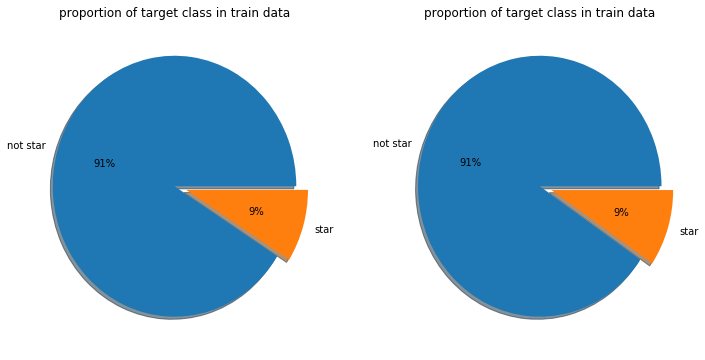

In [63]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(data,test_size = .3,random_state = 123)

plt.figure(figsize=(12,6))
plt.subplot(121)
train["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                              autopct = "%1.0f%%",
                                              shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
test["target_class"].value_counts().plot.pie(labels = ["not star","star"],
                                             autopct = "%1.0f%%",
                                             shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.show()

In [64]:
#Seperating Predictor and target variables
train_X = train[[x for x in train.columns if x not in ["target_class"]]]
train_Y = train[["target_class"]]
test_X  = test[[x for x in test.columns if x not in ["target_class"]]]
test_Y  = test[["target_class"]]

# MODEL

In [ ]:
#MODEL FUNCTION

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)
    
    

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
model(rf,train_X,train_Y,test_X,test_Y,"feat")

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
model(log,train_X,train_Y,test_X,test_Y,"coef")

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model(dt,train_X,train_Y,test_X,test_Y,"feat")

# Extra Tree Classifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier()
model(etc,train_X,train_Y,test_X,test_Y,"feat")

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model(gbc,train_X,train_Y,test_X,test_Y,"feat")

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model(nb,train_X,train_Y,test_X,test_Y,"none")

# K- Nearest Neighbour Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model(knn,train_X,train_Y,test_X,test_Y,"none")

# Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
model(ada,train_X,train_Y,test_X,test_Y,"feat")